
# CRIM Intervals:  Melodic and Harmonic

### Basic Goals

- Examine Macro-level aspects of your Mass+Model corpus (with similarity Matrices and Cadence Maps)
- Examine Micro-level aspects of your Mass+Model corpus (exploring particular ngrams, presentation types, and cadences made evident at the macro-level)
- Draw some conclusions about the overall points of similarity and difference among some subset of your pieces

### Tasks in Detail  



1. Exploring Entry Melodies
- 1.1 **Load the piece(s)** from your corpus

- 1.2 use the **piece.modelFinder** method to build a table summarizing the percentage of "entries" shared among the pieces.  These "entries" are soggetti (expressed as melodic ngrams) that begin after a rest or a section break.  They are thus the most likely soggetti to be remembered and the most likely to be used in important presentation types.
- 1.3 Identify the **two _most similar_ pieces** from your corpus, based on this shared percentage
- 1.4 Find the **piece.entries()** in these pieces.  The 'entries' are the same ones used in the modelFinder, but now you can list and organize them in various ways.

- 1.5 **Which of these entries are shared** by the two pieces?
- 1.6 Make a **HeatMap of the ngrams** in your pieces, and find your shared ngrams on them.
- 1.7 Based on the visual blocks of the HeatMap (and the offsets that show when you hover on them):
    - Where in your piece do these entries appear--at the outset, middle, near the end? 
    - Are they in roughly the same place in the two related movements/pieces?
    - What Presentation Types do these shared entries seem to be involved in?  PEN?  ID?  Fuga? 
- 1.8 Now return to the Presentation Type method (piece.presentationTypes) and see what the CRIM intervals says about your pair of pieces and the partcular ngrams/entries you are focusing on.
    - What types did it find?  Do you agree?  
    - If you search for Hidden Types, does it find still others?
    - Given that the composer of the Mass is definitely using soggetti from the Model, did they do the _same_ thing with that material as found in the model?  Or something different?  Do you they think they were being creative, or just going through the motions?
    - If you listen to the piece, do any of the machine patterns make sense to you?
    
2. Exploring Cadences

- 2.1 Load your pieces
- 2.2 Make a high level Radar plot of the cadences in each one.
    - How similar or varied to they appear?  Which cadence goal tones are involved?  In what basic proportion?  Which plots in your corpus seem most similar?  Most different?  How?
- 2.3. Get the full Cadence Table for your piece.
- 2.4  Now use pandas to make some more detailed assessment of the most simliar and most dislimiar pieces in your corpus:
    - What's the final cadence of each piece?  Are they the same?  This is the FINAL of the piece, and stands in for the 'mode'
    - What's the most frequent cadence tone?  How is it different from the FINAL?
    - Make a combined 'progress' plot of the model along with the _most_ and _least_ similar mass movement (based on your inspection of the radar plot).  Are there any _subseries_ of cadences that seem similar to each other in the two pieces?  Do they appear at the _same_ time in the works, or different ones?
    - Listen to the pieces, and see if you can hear any of these simlarities.
    
    
3.  Overall Conclusions

- How are your chosen pieces most related?  Most different?  Write a few sentences and provide some highlights from your analysis



#### Read Documentation for Each Method
- Read the documentation with this command `print(ImportedPiece.YourMethod.__doc__)`, where you will replace `'YourMethod'` with the name of the individual method, for example `print(ImportedPiece.melodic.__doc__)`


*** 

## A. Import Intervals and Other Code

* The first step is to import all the code required for the Notebook
* **`arrow/run`** or **`Shift + Enter`** in the following cell:

In [130]:
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt
import matplotlib.pyplot as plt
# import modules
import seaborn as sns
from ipywidgets import interact
from pandas.io.json import json_normalize
from pyvis.network import Network
from IPython.display import display
import requests
import os
import glob as glob


MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)
else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)
else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


## B. Importing a Piece

### B.1 Import a Piece

In [2]:
# Import your Model

prefix = 'https://crimproject.org/mei/CRIM_Model_'

model_ID = '0008' # <== put your ID number here!

# join the strings and import piece
url = prefix + model_ID + '.mei'
piece = importScore(url)

print(piece.metadata)


Successfully imported https://crimproject.org/mei/CRIM_Model_0008.mei
{'title': 'Ave Maria', 'composer': 'Josquin Des Prés'}


In [10]:
# Import Your Mass as a corpus
corpus = []
mass_id = "0005" # <== put your Mass number here!
for l in range(1, 6):
    mass = f'https://crimproject.org/mei/CRIM_Mass_{mass_id}_{l:01}.mei'
    corpus.append(importScore(mass))

Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_1.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_2.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_3.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_4.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_5.mei


In [131]:
# Import Your Mass and Model as a combined Corpus:
corpus_list = []
prefix = 'https://crimproject.org/mei/CRIM_Model_'

# select IDs for your Mass and Model
model_id = "0008"  # <==  put your model number here!
mass_id = "0005" # <== put your Mass number here!
model = prefix + model_ID + '.mei'
corpus_list.append(model)
for l in range(1, 6):
    mass = f'https://crimproject.org/mei/CRIM_Mass_{mass_id}_{l:01}.mei'
    corpus_list.append(mass)
# corpus_list[0]

In [132]:
corpus = CorpusBase(corpus_list)
similarity_matrix = corpus.modelFinder()
similarity_matrix

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


Model,CRIM_Model_0008,CRIM_Mass_0005_1,CRIM_Mass_0005_2,CRIM_Mass_0005_3,CRIM_Mass_0005_4,CRIM_Mass_0005_5
Mass,,,,,,
CRIM_Model_0008,1.000000,0.350877,0.649123,0.736842,0.315789,0.263158
CRIM_Mass_0005_1,0.717949,1.000000,0.743590,0.410256,0.615385,0.410256
CRIM_Mass_0005_2,0.660714,0.196429,1.000000,0.714286,0.285714,0.160714
CRIM_Mass_0005_3,0.592920,0.159292,0.513274,1.000000,0.309735,0.247788
CRIM_Mass_0005_4,0.205128,0.230769,0.358974,0.435897,1.000000,0.358974
CRIM_Mass_0005_5,0.409091,0.318182,0.318182,0.590909,0.636364,1.000000


### The Matrix as Heatmap

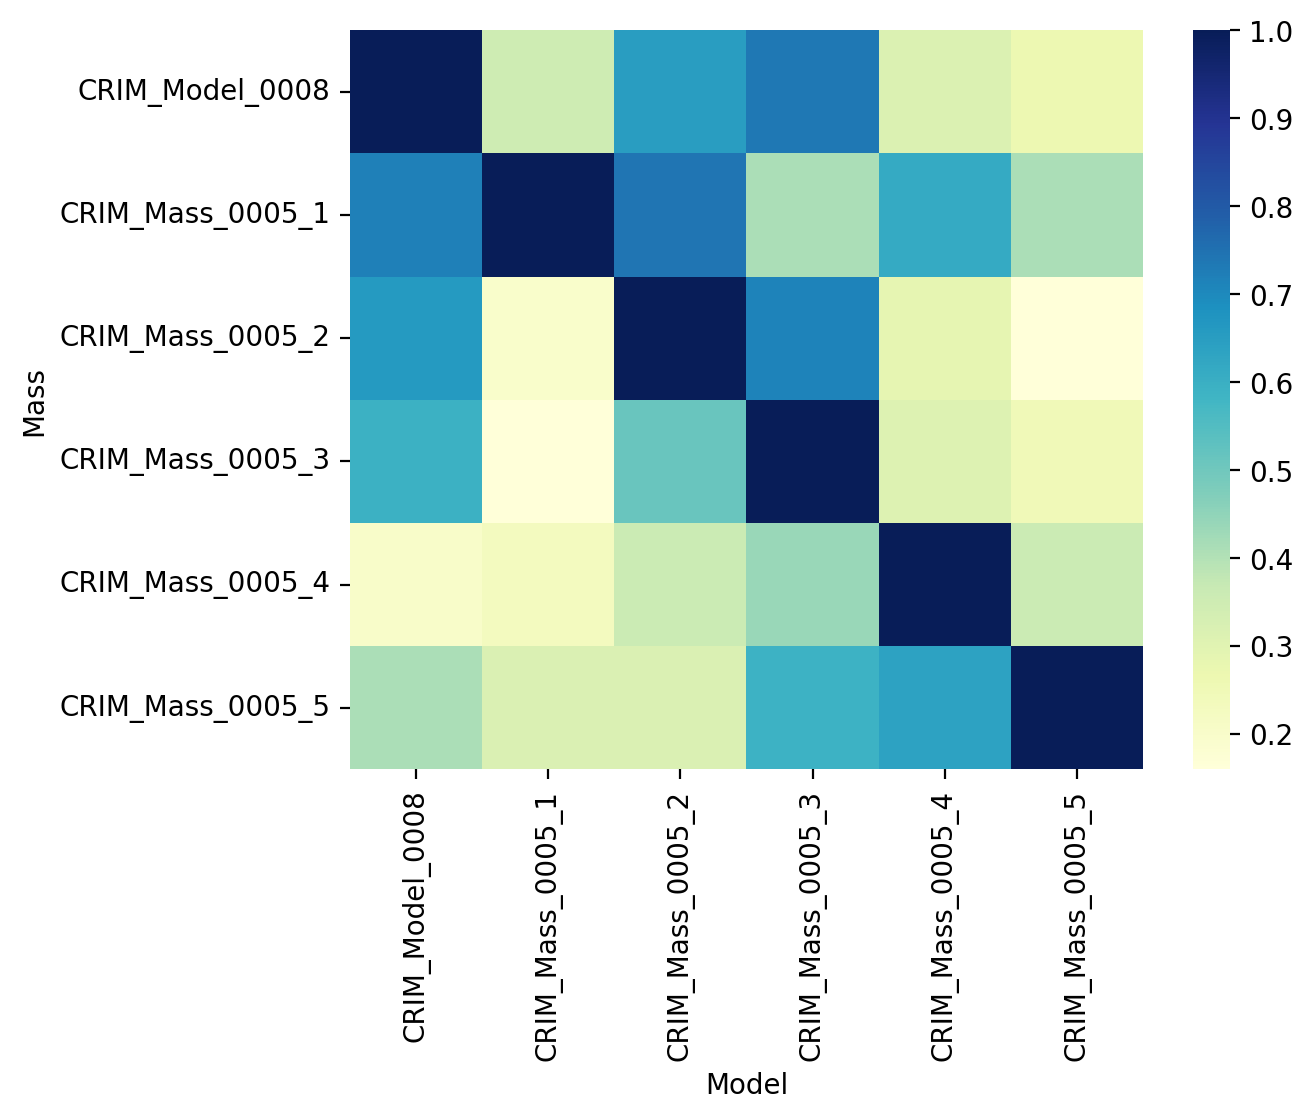

In [133]:

dataplot = sns.heatmap(similarity_matrix, cmap="YlGnBu", annot=False)
plt.show()


### Melodic Ngrams--Limited to Entries

Entries are the soggetti that 'enter' after a rest or section break

- `Combine Unisons` by default
- `Diatonic intervals without quality` by default
- use `thematic=True` and `anywhere=True` (ask why some time later!)
- use `n=4` for length of ngrams to start



In [135]:
model = corpus.scores[0]
model.metadata
mass_1 = corpus.scores[1]
mass_1.metadata

{'title': 'Missa Ave Maria: Kyrie', 'composer': 'Antoine de Févin'}

In [136]:
model_entries = model.entries(thematic=True, anywhere=True, n=4)
model_entries_det = model.detailIndex(model_entries, offset=True, progress=True)
mass_1_entries = mass_1.entries(thematic=True, anywhere=True, n=4)
mass_1_entries_det = mass_1.detailIndex(mass_1_entries, offset=True, progress=True)
model_entries_det

,,,,[Superius],Altus,Tenor,Bassus
Measure,Beat,Offset,Progress,,,,
1,1.0,0.0,0.000000,"(4, 2, 2, -3)",NaN,NaN,NaN
3,1.0,16.0,0.012422,NaN,"(4, 2, 2, -3)",NaN,NaN
5,1.0,32.0,0.024845,NaN,NaN,"(4, 2, 2, -3)",NaN
7,1.0,48.0,0.037267,NaN,NaN,NaN,"(4, 2, 2, -3)"
8,1.0,56.0,0.043478,"(-2, -2, -2, 2)",NaN,NaN,NaN
...,...,...,...,...,...,...,...
139,4.0,1174.0,0.911491,NaN,NaN,NaN,"(-2, -2, -2, 2)"
140,1.5,1177.0,0.913820,NaN,NaN,NaN,"(-2, -2, 2, -2)"
143,1.0,1200.0,0.931677,"(2, 2, 2, -2)",NaN,"(-2, -2, 2, 2)","(5, -2, -2, -2)"


Which Ngrams are in Fact Shared by these pieces?

In [139]:
model_entries_stack = model_entries.stack()
mass_1_entries_stack = mass_1_entries.stack()
shared_entries = set(mass_1_entries_stack).intersection(model_entries_stack)
shared_entries


{('-2', '-2', '-2', '-2'),
 ('-2', '-2', '-2', '2'),
 ('-3', '-2', '2', '2'),
 ('2', '2', '2', '-2'),
 ('4', '2', '2', '-3')}

In [143]:
model_short_list = model_entries_det[model_entries_det.isin(shared_entries)].dropna(how='all').stack()
model_short_list

Measure  Beat  Offset  Progress            
1        1.0   0.0     0.000000  [Superius]       (4, 2, 2, -3)
3        1.0   16.0    0.012422  Altus            (4, 2, 2, -3)
5        1.0   32.0    0.024845  Tenor            (4, 2, 2, -3)
7        1.0   48.0    0.037267  Bassus           (4, 2, 2, -3)
8        1.0   56.0    0.043478  [Superius]     (-2, -2, -2, 2)
                                                     ...       
138      2.0   1162.0  0.902174  Bassus         (-2, -2, -2, 2)
139      4.0   1174.0  0.911491  Bassus         (-2, -2, -2, 2)
143      1.0   1200.0  0.931677  [Superius]       (2, 2, 2, -2)
144      1.0   1208.0  0.937888  Bassus        (-2, -2, -2, -2)
147      3.0   1236.0  0.959627  [Superius]     (-2, -2, -2, 2)
Length: 79, dtype: object

In [141]:
mass_1_short_list = mass_1_entries_det[mass_1_entries_det.isin(shared_entries)].dropna(how='all').stack()
mass_1_short_list

Measure  Beat  Offset  Progress            
7        4.0   54.0    0.069588  Sup[erius]     (-2, -2, -2, 2)
                                 Altus         (-2, -2, -2, -2)
8        4.0   62.0    0.079897  Altus          (-2, -2, -2, 2)
9        3.0   68.0    0.087629  Tenor            (4, 2, 2, -3)
12       1.0   88.0    0.113402  Altus            (4, 2, 2, -3)
                                                     ...       
86       1.5   697.0   0.898196  Bassus           (2, 2, 2, -2)
         4.0   702.0   0.904639  Tenor          (-2, -2, -2, 2)
94       2.0   762.0   0.981959  Tenor         (-2, -2, -2, -2)
         3.5   765.0   0.985825  Tenor          (-2, -2, -2, 2)
         4.0   766.0   0.987113  Sup[erius]     (-2, -2, -2, 2)
Length: 87, dtype: object

In which voice are the borrowings concentrated?

In [109]:
model_offsets_of_shared_entries = model_short_list.index.get_level_values(2)
model_offsets_of_shared_entries

Float64Index([   0.0,   16.0,   32.0,   48.0,   56.0,   72.0,   88.0,  104.0,
               144.0,  147.0,  158.0,  161.0,  176.0,  195.0,  212.0,  216.0,
               216.0,  219.0,  220.0,  222.0,  244.0,  248.0,  276.0,  280.0,
               328.0,  328.0,  380.0,  382.0,  382.0,  398.0,  406.0,  418.0,
               452.0,  492.0,  544.0,  547.0,  586.0,  596.0,  598.0,  664.0,
               667.0,  672.0,  676.0,  704.0,  712.0,  718.0,  726.0,  760.0,
               766.0,  808.0,  814.0,  868.0,  872.0,  880.0,  892.0,  948.0,
               974.0,  980.0,  992.0,  998.0, 1012.0, 1038.0, 1044.0, 1056.0,
              1062.0, 1076.0, 1092.0, 1092.0, 1096.0, 1110.0, 1113.0, 1138.0,
              1141.0, 1158.0, 1162.0, 1174.0, 1200.0, 1208.0, 1236.0],
             dtype='float64', name='Offset')

In [112]:
mass_1_offsets_of_shared_entries = mass_1_short_list.index.get_level_values(2)
mass_1_offsets_of_shared_entries

Float64Index([ 54.0,  54.0,  62.0,  68.0,  88.0,  92.0,  92.0, 108.0, 112.0,
              112.0, 128.0, 132.0, 148.0, 152.0, 170.0, 186.0, 188.0, 194.0,
              202.0, 202.0, 206.0, 220.0, 228.0, 240.0, 240.0, 243.0, 244.0,
              260.0, 296.0, 304.0, 307.0, 319.5, 320.0, 328.0, 336.0, 339.0,
              351.0, 352.0, 360.0, 362.0, 372.0, 372.0, 383.0, 390.0, 392.0,
              396.0, 404.0, 406.0, 416.0, 418.0, 428.0, 428.0, 438.0, 442.0,
              443.0, 454.0, 458.0, 464.0, 478.0, 480.0, 482.0, 488.0, 500.0,
              500.0, 594.0, 596.0, 598.0, 599.0, 600.0, 612.0, 615.0, 616.0,
              628.0, 630.0, 644.0, 647.0, 648.0, 664.0, 674.0, 677.0, 678.0,
              690.0, 697.0, 702.0, 762.0, 765.0, 766.0],
             dtype='float64', name='Offset')

In [144]:
model_short_list.index.get_level_values(4).value_counts()

Altus         28
[Superius]    22
Tenor         16
Bassus        13
dtype: int64

In [145]:
mass_1_short_list.index.get_level_values(4).value_counts()

Bassus        25
Altus         23
Tenor         20
Sup[erius]    19
dtype: int64

In [105]:
mass_1_entries_det.isin(shared_entries).dropna(how='all').stack()

Measure  Beat  Offset  Progress            
1        1.0   0.0     0.000000  Sup[erius]    False
                                 Altus         False
                                 Tenor         False
                                 Bassus        False
3        3.0   20.0    0.025773  Sup[erius]    False
                                               ...  
94       3.5   765.0   0.985825  Bassus        False
         4.0   766.0   0.987113  Sup[erius]     True
                                 Altus         False
                                 Tenor         False
                                 Bassus        False
Length: 440, dtype: bool

In [147]:
ptypes = model.presentationTypes(combine_unisons=True)
ptypes

,Composer,Title,First_Offset,Measures_Beats,Melodic_Entry_Intervals,Offsets,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type,Number_Entries,Flexed_Entries,Parallel_Entries,Parallel_Voice,Count_Non_Overlaps
0,Josquin Des Prés,Ave Maria,0.0,"[1/1.0, 3/1.0, 5/1.0, 7/1.0]","[P-8, P1, P-8]","[0.0, 16.0, 32.0, 48.0]","[(4, 2, 2, -3)]","[16.0, 16.0, 16.0]","[[Superius], Altus, Tenor, Bassus]",PEN,4,False,0.0,None,0
1,Josquin Des Prés,Ave Maria,56.0,"[8/1.0, 10/1.0, 12/1.0, 14/1.0]","[P-8, P1, P-8]","[56.0, 72.0, 88.0, 104.0]","[(-2, -2, -2, 2)]","[16.0, 16.0, 16.0]","[[Superius], Altus, Tenor, Bassus]",PEN,4,False,0.0,None,0
2,Josquin Des Prés,Ave Maria,176.0,"[23/1.0, 28/1.0]",[P-8],"[176.0, 216.0]","[(-3, -2, 2, 2), (-2, -2, 2, 2)]",[40.0],"[Altus, Bassus]",FUGA,2,True,0.0,None,0
3,Josquin Des Prés,Ave Maria,244.0,"[31/3.0, 35/3.0]",[P-8],"[244.0, 276.0]","[(2, 2, 2, -2)]",[32.0],"[[Superius], Tenor]",FUGA,2,False,0.0,None,0
4,Josquin Des Prés,Ave Maria,428.0,"[54/3.0, 55/1.0, 59/3.0, 60/1.0]","[P-5, P-4, P-5]","[428.0, 432.0, 468.0, 472.0]","[(4, -2, 2, 2)]","[4.0, 36.0, 4.0]","[[Superius], Altus, Tenor, Bassus]",ID,4,False,0.0,None,0
5,Josquin Des Prés,Ave Maria,508.0,"[64/3.0, 66/3.0, 67/3.0, 69/3.0]","[P-5, P-4, P-5]","[508.0, 524.0, 532.0, 548.0]","[(2, -3, 2, -3)]","[16.0, 8.0, 16.0]","[[Superius], Altus, Tenor, Bassus]",ID,4,False,0.0,None,0
6,Josquin Des Prés,Ave Maria,616.0,"[78/1.0, 81/1.0]",[P-8],"[616.0, 640.0]","[(2, -3, 2, -2)]",[24.0],"[[Superius], Tenor]",FUGA,2,False,0.0,None,0
7,Josquin Des Prés,Ave Maria,748.0,"[94/1.0, 98/1.0]",[P1],"[748.0, 796.0]","[(2, -2, -2, -2)]",[48.0],"[Altus, Altus]",FUGA,2,False,0.0,None,1
8,Josquin Des Prés,Ave Maria,796.0,"[98/1.0, 98/2.0]",[P-5],"[796.0, 800.0]","[(2, 2, -3, 4)]",[4.0],"[[Superius], Tenor]",FUGA,2,False,0.0,None,0
9,Josquin Des Prés,Ave Maria,944.0,"[111/1.0, 114/1.0, 119/1.0, 122/1.0]","[P-8, P8, P-8]","[944.0, 968.0, 1008.0, 1032.0]","[(2, -2, -2, -2)]","[24.0, 40.0, 24.0]","[[Superius], Tenor, [Superius], Tenor]",ID,4,False,0.0,None,0


In [148]:
ptypes = model.presentationTypes(combine_unisons=True)
model_shared_entry_ptypes = ptypes[ptypes.First_Offset.isin(model_offsets_of_shared_entries)]
model_shared_entry_ptypes

,Composer,Title,First_Offset,Measures_Beats,Melodic_Entry_Intervals,Offsets,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type,Number_Entries,Flexed_Entries,Parallel_Entries,Parallel_Voice,Count_Non_Overlaps
0,Josquin Des Prés,Ave Maria,0.0,"[1/1.0, 3/1.0, 5/1.0, 7/1.0]","[P-8, P1, P-8]","[0.0, 16.0, 32.0, 48.0]","[(4, 2, 2, -3)]","[16.0, 16.0, 16.0]","[[Superius], Altus, Tenor, Bassus]",PEN,4,False,0.0,None,0
1,Josquin Des Prés,Ave Maria,56.0,"[8/1.0, 10/1.0, 12/1.0, 14/1.0]","[P-8, P1, P-8]","[56.0, 72.0, 88.0, 104.0]","[(-2, -2, -2, 2)]","[16.0, 16.0, 16.0]","[[Superius], Altus, Tenor, Bassus]",PEN,4,False,0.0,None,0
2,Josquin Des Prés,Ave Maria,176.0,"[23/1.0, 28/1.0]",[P-8],"[176.0, 216.0]","[(-3, -2, 2, 2), (-2, -2, 2, 2)]",[40.0],"[Altus, Bassus]",FUGA,2,True,0.0,None,0
3,Josquin Des Prés,Ave Maria,244.0,"[31/3.0, 35/3.0]",[P-8],"[244.0, 276.0]","[(2, 2, 2, -2)]",[32.0],"[[Superius], Tenor]",FUGA,2,False,0.0,None,0
10,Josquin Des Prés,Ave Maria,948.0,"[111/3.0, 119/3.0]",[P1],"[948.0, 1012.0]","[(-2, -2, -2, -2)]",[64.0],"[Altus, Altus]",FUGA,2,False,0.0,None,1
12,Josquin Des Prés,Ave Maria,980.0,"[115/3.0, 123/3.0, 127/3.0, 129/3.0]","[P1, m7, P-8]","[980.0, 1044.0, 1076.0, 1092.0]","[(2, 2, 2, -2)]","[64.0, 32.0, 16.0]","[Altus, Altus, [Superius], Tenor]",FUGA,4,False,0.0,None,2


In [149]:
ptypes = mass_1.presentationTypes(combine_unisons=True)
mass_1_shared_entry_ptypes = ptypes[ptypes.First_Offset.isin(mass_1_offsets_of_shared_entries)]
mass_1_shared_entry_ptypes

,Composer,Title,First_Offset,Measures_Beats,Melodic_Entry_Intervals,Offsets,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type,Number_Entries,Flexed_Entries,Parallel_Entries,Parallel_Voice,Count_Non_Overlaps
1,Antoine de Févin,Missa Ave Maria: Kyrie,68.0,"[9/3.0, 12/1.0, 14/3.0, 17/1.0]","[P1, P8, P-8]","[68.0, 88.0, 108.0, 128.0]","[(4, 2, 2, -3)]","[20.0, 20.0, 20.0]","[Tenor, Altus, Sup[erius], Tenor]",PEN,4,False,0.0,None,0
2,Antoine de Févin,Missa Ave Maria: Kyrie,170.0,"[22/2.0, 24/2.0]",[m-3],"[170.0, 186.0]","[(-2, -2, -2, 2)]",[16.0],"[Altus, Tenor]",FUGA,2,False,0.0,None,0
3,Antoine de Févin,Missa Ave Maria: Kyrie,228.0,"[29/3.0, 37/1.0, 41/1.0, 45/1.0, 46/3.0, 50/3....","[P4, P-8, P12, P-8, P1, P8, P-8]","[228.0, 296.0, 328.0, 360.0, 372.0, 404.0, 416...","[(2, 2, 2, -2)]","[68.0, 32.0, 32.0, 12.0, 32.0, 12.0, 12.0]","[Tenor, Altus, Bassus, Sup[erius], Bassus, Ten...",FUGA,8,False,0.0,None,0
4,Antoine de Févin,Missa Ave Maria: Kyrie,304.0,"[38/1.0, 42/1.0, 45/2.0, 50/4.0, 52/2.0, 56/4....","[P-8, P5, P-8, P8, P-8, P8, P1, P8]","[304.0, 336.0, 362.0, 406.0, 418.0, 454.0, 458...","[(-2, -2, -2, 2)]","[32.0, 26.0, 44.0, 12.0, 36.0, 4.0, 20.0, 4.0]","[Sup[erius], Tenor, Altus, Bassus, Altus, Bass...",FUGA,9,False,0.0,None,0
6,Antoine de Févin,Missa Ave Maria: Kyrie,596.0,"[73/3.0, 77/3.0]",[P8],"[596.0, 628.0]","[(-3, -2, 2, 2)]",[32.0],"[Bassus, Altus]",FUGA,2,False,0.0,None,0
8,Antoine de Févin,Missa Ave Maria: Kyrie,702.0,"[86/4.0, 94/4.0]",[P8],"[702.0, 766.0]","[(-2, -2, -2, 2)]",[64.0],"[Tenor, Sup[erius]]",FUGA,2,False,0.0,None,1


A fuller approach:

In [13]:
nr = piece.notes(combineUnisons=True)
mel = piece.melodic(df=nr, kind='d', end=False)
mel_ng = piece.ngrams(df=mel, n=4)
entries = piece.entries(df=mel_ng, thematic=True, anywhere=True)
piece.detailIndex(entries, offset=True, progress=True).head()

,,,,[Superius],Altus,Tenor,Bassus
Measure,Beat,Offset,Progress,,,,
1,1.0,0.0,0.000000,"(4, 2, 2, -3)",NaN,NaN,NaN
3,1.0,16.0,0.012422,NaN,"(4, 2, 2, -3)",NaN,NaN
5,1.0,32.0,0.024845,NaN,NaN,"(4, 2, 2, -3)",NaN
7,1.0,48.0,0.037267,NaN,NaN,NaN,"(4, 2, 2, -3)"
8,1.0,56.0,0.043478,"(-2, -2, -2, 2)",NaN,NaN,NaN


## Show the Ngrams with a Heatmap

In [122]:
@interact
def get_plot(entries_only = [True, False],
             combine_unisons=[False, True], 
             kind=["d", "q", "c", "z"], 
             compound=[True, False], 
             length=[5, 2, 3, 4, 6],
            regularize=[0, 1, 2, 4],
            top_patterns=["all", 5, 10, 20]):
    if entries_only == True:
        nr = piece.notes(combineUnisons=combine_unisons)
        # unit MUST be 0 for "limit to entries" 
        mel = piece.melodic(df=nr, kind=kind, compound=compound, unit=0, end=False)
        mel_ngrams = piece.ngrams(df=mel, n=length)
        entry_ngrams = piece.entries(df=mel, n=length)
        mel_ngrams_duration = piece.durations(df=mel, n=length, mask_df=entry_ngrams)
        if top_patterns == "all":
            return viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=[], voices=[])
        else:
            mel_ngrams_top_patterns_df = entry_ngrams.stack().value_counts().to_frame().head(top_patterns)
            mel_ngrams_top_patterns_list = mel_ngrams_top_patterns_df.index.to_list()
#             return mel_ngrams_top_patterns_list
            return viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=mel_ngrams_top_patterns_list, voices=[])
    else:
        if top_patterns == "all":
            nr = piece.notes(combineUnisons=combine_unisons)
            mel = piece.melodic(df=nr, kind=kind, compound=False, unit=regularize, end=False)
            mel_ngrams = piece.ngrams(df=mel, n=length)
            mel_ngrams_duration = piece.durations(df=mel, n=5, mask_df=mel_ngrams)
            return viz.plot_ngrams_heatmap(mel_ngrams, mel_ngrams_duration, selected_patterns=[], voices=[])           
        else:
            mel = piece.melodic(kind='d', compound=False, unit=regularize)
            mel_ngrams = piece.ngrams(df=mel, n=5)
            mel_ngrams_duration = piece.durations(df=mel, n=5, mask_df=mel_ngrams)
            mel_ngrams_top_patterns_df = mel_ngrams.stack().value_counts().to_frame().head(top_patterns)
            mel_ngrams_top_patterns_list = mel_ngrams_top_patterns_df.index.to_list()
            return viz.plot_ngrams_heatmap(mel_ngrams, mel_ngrams_duration, selected_patterns=mel_ngrams_top_patterns_list, voices=[])

interactive(children=(Dropdown(description='entries_only', options=(True, False), value=True), Dropdown(descri…

### C.4 Search for Melodic nGrams

*  Here we can use Python tools to **search for any given 'string' of intervals**, and highlight them in the resulting data frame.
<br>

    * Note that we can also search at any given **constant time unit** (such as every 2 offsets = half note)
    * To do this we just add `unit=n` to the `getNgrams` request
    * We can also select to display as offsets or measures/beats
    
<br>

* Use the boxes below to **interact** with the code without needing to write it!
    * `search_pattern` returns any nGram with the interval sequence you use.  Include comma and space after each interval.
    * `kind` selects **quality**, **diatonic**, **chromatic**, or **zero**
    * `compound` will be **true** or **false**
    * `length` is the **length** of the `nGram` (three intervals is of course four notes); use `-1` for maximum length before any given rest.
    * `style` determines whether the results are listed by **offset** or **measure + beat**
    * `endpoint` determines whether the offset (or measure + beat) represents **first note** of the pattern or the **last**.  

<br>

* Sample search for **Model_0008**:  `4, 1, 2, 2, -3`  (use `kind="d"` and `length=5`)

<br>
    * Notice the regular time intervals between identical nGrams--the **classifier** can use this to predict presentation types.

In [8]:
def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out
@interact
def get_ngrams(search_pattern="", kind=["d", "q", "c", "z"], unisons=[False, True], compound=[True, False], length=[2, 3, 4, 5, 6], endpoint=["first", "last"]):
    nr = piece.notes(combineUnisons=unisons)
    ngrams = piece.ngrams(df=piece.melodic(df=nr, kind=kind), n=length, offsets=endpoint)
    ngrams = ngrams.applymap(convertTuple)
    mask = ngrams.apply(lambda x: x.apply(str).str.contains(search_pattern).any(), axis=1)

    filtered_ngrams = ngrams[mask].copy()
    filtered_ngrams.astype(str).copy
    
    beats_measures_mel = piece.detailIndex(filtered_ngrams, offset=True)

    return beats_measures_mel.fillna("-").applymap(str).style.applymap(lambda x: "background: #ccebc5" if re.search(search_pattern, x) else "")

    

interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('d',…

## E. Corpus Inventory

* The **CorpusBase** class is a convenient way to find patterns in any given list of pieces.
    
* See the **Corpus Methods** Notebook for details, and `print(CorpusBase.batch.__doc__)`

### E.1  Corpus Melodic Inventory

* Also see Corpus Methods Notebook for other ways to import local and remote files!
* Get the `ngrams` for all of the pieces.  
*  In this case:  modules of length "3", with diatonic
*  Then combine them into one frame

* NB: use `ImportedPiece`, not `piece`!
* NB:  `func1` and `func2` do **NOT** include the closing parentheses!

    > `func1 = ImportedPiece.melodic` <br>
    > `list_of_dfs = corpus.batch(func=func1, kwargs={'kind': 'd', 'end': False}, metadata=False)`<br>
    > `func2 = ImportedPiece.ngrams`<br>
    > `list_of_melodic_ngrams = corpus.batch(func=func2, kwargs={'n': 4, 'df': list_of_dfs}, metadata=True)`<br>
    > `title_of_output = pd.concat(list_of_melodic_ngrams)`<br>



#### Import Corpus with URLs

In [38]:
#  first the list of pieces
corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0050_1.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_2.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_3.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_4.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_5.mei'
                     ])

Successfully imported https://crimproject.org/mei/CRIM_Mass_0050_1.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0050_2.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0050_3.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0050_4.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0050_5.mei


#### Import All Local Files

* See Corpus Methods notebook for more options!

In [124]:
corpus  = CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0006_1.mei'])

Successfully imported https://crimproject.org/mei/CRIM_Mass_0006_1.mei


### Corpus Results for Melodic Ngrams

In [125]:

func1 = ImportedPiece.melodic
list_of_dfs = corpus.batch(func=func1, kwargs={'kind': 'd', 'end': False}, metadata=False)
func2 = ImportedPiece.ngrams
list_of_melodic_ngrams = corpus.batch(func=func2, kwargs={'n': 5, 'df': list_of_dfs}, metadata=False)
func3 = ImportedPiece.detailIndex
list_of_detail_index = corpus.batch(func=func3, kwargs={'offset': False,'df': list_of_melodic_ngrams}, metadata=True)

mel_corpus = pd.concat(list_of_detail_index)
comp = mel_corpus.pop("Composer")
mel_corpus['Composer'] = comp
title = mel_corpus.pop("Title")
mel_corpus["Title"] = title
mel_corpus = mel_corpus.fillna('-')


In [126]:
mel_corpus

1                  2                 3                     4  \
Measure Beat                                                                 
1       1.0   -                  -                 -     (1, 1, 3, -2, -2)   
        3.0   -                  -  (1, 1, 3, 2, -4)    (1, 3, -2, -2, -2)   
        4.0   -                  -                 -   (3, -2, -2, -2, -2)   
2       1.0   -   (1, 1, 2, 1, -2)                 -  (-2, -2, -2, -2, -3)   
        2.5   -                  -                 -   (-2, -2, -2, -3, 2)   
...          ..                ...               ...                   ...   
62      1.0   -  (2, 2, -2, 2, -2)   (2, 2, 2, 2, 2)                     -   
        1.5   -                  -   (2, 2, 2, 2, 2)                     -   
        2.0   -                  -  (2, 2, 2, 2, -3)                     -   
        2.5   -                  -  (2, 2, 2, -3, 2)                     -   
        3.0   -                  -  (2, 2, -3, 2, 2)                     -   

                Composer                            Title  
Measure Beat                                               
1       1.0   Jean Guyon  Missa Je suis déshéritée: Kyrie  
        3.0   Jean Guyon  Missa Je suis déshéritée: Kyrie  
        4.0   Jean Guyon  Missa Je suis déshéritée: Kyrie  
2       1.0   Jean Guyon  Missa Je suis déshéritée: Kyrie  
        2.5   Jean Guyon  Missa Je suis déshéritée: Kyrie  
...                  ...                              ...  
62      1.0   Jean Guyon  Missa Je suis déshéritée: Kyrie  
        1.5   Jean Guyon  Missa Je suis déshéritée: Kyrie  
        2.0   Jean Guyon  Missa Je suis déshéritée: Kyrie  
        2.5   Jean Guyon  Missa Je suis déshéritée: Kyrie  
        3.0   Jean Guyon  Missa Je suis déshéritée: Kyrie  

[276 rows x 6 columns]

In [127]:
mel_corpus.stack().value_counts().to_frame()

,0
-,620
Missa Je suis déshéritée: Kyrie,276
Jean Guyon,276
"(2, 2, 2, 2, 2)",15
"(1, 1, -2, -2, -2)",14
...,...
"(3, 2, -4, 6, -2)",1
"(-4, -2, 2, 2, 2)",1
"(3, -2, 2, 2, 2)",1
"(1, 1, 5, 2, -4)",1


In [128]:
mel_corpus.to_csv('saved_csv/riquet_soggetti.csv')

## Search The Corpus for a Particular Melodic NGram String

Note that the 'output' much match the name of the combined results created above

In [129]:

def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out

@interact
def mel_ngram_search(my_search="", df = fixed(mel_corpus)):
    df_no_tuple = df.applymap(convertTuple)
    df_no_tuple.pop("Composer")
    df_no_tuple.pop("Title")
    df_no_tuple.insert(0, "Composer", df["Composer"])
    df_no_tuple.insert(1, "Title", df["Title"])
    filtered_ngrams = df_no_tuple[df_no_tuple.apply(lambda x: x.astype(str).str.contains(my_search).any(), axis=1)].copy()
    
    pd.set_option('max_columns', None)
    return filtered_ngrams.fillna("-").reset_index().applymap(str).style.applymap(lambda x: "background: #ccebc4" if re.search(my_search, x) else "")

interactive(children=(Text(value='', description='my_search'), Output()), _dom_classes=('widget-interact',))